In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
import pandas as pd


%matplotlib inline

In [2]:
# load the data and check the data shape

mtaRides = np.load('MTA_Fare.npy')

mtaRides.shape

(600, 23, 194)

In [3]:
# check the -1 entries in the matrix and replace with nan

mtaRides = mtaRides.astype(float)

mtaRides[mtaRides == -1] = np.nan

In [4]:
# sum time series for all stations

sta_allsum = np.nansum(mtaRides, axis=0)
print('the station sum array shape is: %s' % (sta_allsum.shape, ))

typ_allsum = np.nansum(mtaRides, axis=1)
print('the card type sum array shape is: %s' % (typ_allsum.shape, ))

allsum = np.nansum(typ_allsum, axis=0)
print('sum for all card types and all stations is: %s' % (allsum.shape, ))

the station sum array shape is: (23, 194)
the card type sum array shape is: (600, 194)
sum for all card types and all stations is: (194,)


In [5]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [6]:
# create the time axis for the time series

start_date = datetime.date(2010, 5, 21)
end_date = datetime.date(2014, 1, 31)

time_x = pd.date_range(start_date, end_date, freq='W-FRI')

print(start_date)
print(end_date)
print(time_x)

2010-05-21
2014-01-31
DatetimeIndex(['2010-05-21', '2010-05-28', '2010-06-04', '2010-06-11',
               '2010-06-18', '2010-06-25', '2010-07-02', '2010-07-09',
               '2010-07-16', '2010-07-23',
               ...
               '2013-11-29', '2013-12-06', '2013-12-13', '2013-12-20',
               '2013-12-27', '2014-01-03', '2014-01-10', '2014-01-17',
               '2014-01-24', '2014-01-31'],
              dtype='datetime64[ns]', length=194, freq='W-FRI')


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


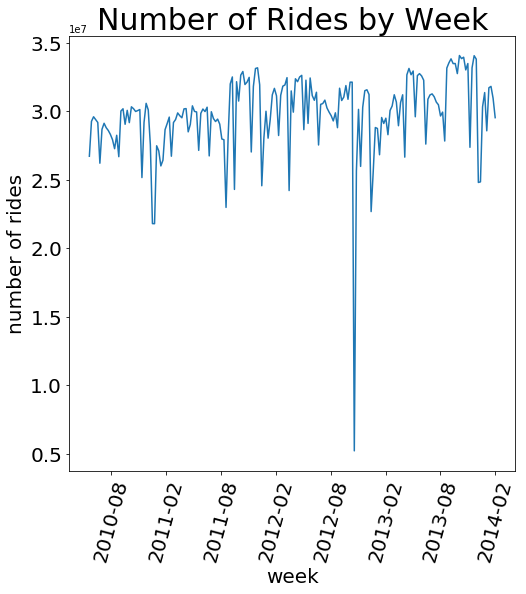

In [7]:
# plotting the all rides from week 2010/5/21 - 2014/1/31

plt.figure(figsize=(8,8))

plt.plot(time_x, allsum)
plt.xticks(rotation=75, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlabel("week", fontsize=20)
plt.ylabel("number of rides", fontsize=20)
plt.title('Number of Rides by Week', fontsize=30)

Fig 1 the number of rides by week from all stations and all card types. Notice the significance frop between in 2012. 

In [8]:
# identifying the event by setting a threshold at three standard deviation away from the mean

print ("mean rides by week {:.2f}".format(allsum.mean()))
print ("stdev rides by week {:.2f}".format(allsum.std()))
thresholds = [allsum.mean() + 3 * allsum.std(), allsum.mean() - 3 * allsum.std()]
print ("3-sigma thresholds {:.2f} {:.2f}".format(*thresholds))

mean rides by week 29781349.87
stdev rides by week 2983960.42
3-sigma thresholds 38733231.14 20829468.61


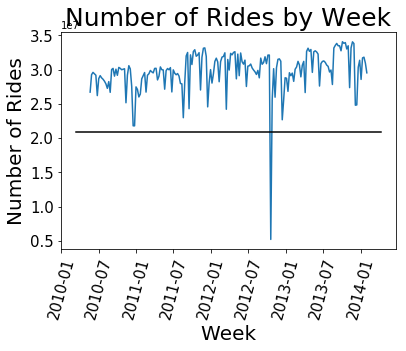

In [9]:
# plotting the rides with threshold line

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(time_x, allsum)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [thresholds[1], thresholds[1]], color='k')

plt.xticks(rotation=75, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.xlabel("Week", fontsize=20)
plt.ylabel("Number of Rides", fontsize=20)
plt.title('Number of Rides by Week', fontsize=25)

Fig 2. the week with three standard deviation threshold plotted. It looks like a single event have crossed the threshold. 

In [10]:
# find the event location

print(np.where(allsum < thresholds[1]))

event_index = np.where(allsum < thresholds[1])[0][0]

print('The total rides number in the week of event is: {}'.format(allsum[event_index]))
print('The event took place in the week of: {}'.format(time_x[event_index].date()))
print('which is the week that Hurricane Sandy hit NYC')

(array([126]),)
The total rides number in the week of event is: 5218686.0
The event took place in the week of: 2012-10-19
which is the week that Hurricane Sandy hit NYC


## Task 2

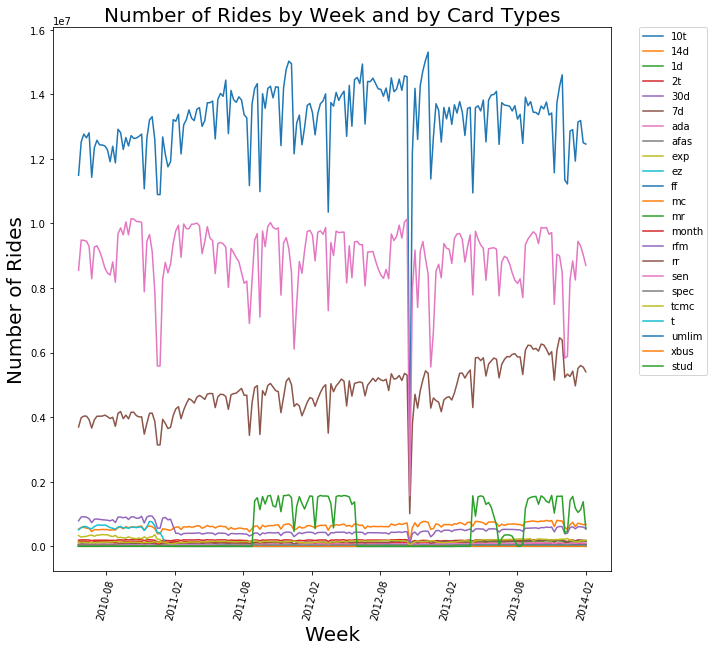

In [11]:
# for this problem only the card types are interested. So the weighted average for rides
# for each card type is used in this case

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for i in range(sta_allsum.shape[0]):
    ax.plot(time_x, sta_allsum[i,:], label=ridetype[i])

plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Week", fontsize=20)
plt.ylabel("Number of Rides", fontsize=20)
plt.title('Number of Rides by Week and by Card Types', fontsize=20)

Fig 3 the total rides by week by card types. Notice the different card types are shown in different colors. Yet, it is still difficult just by the visual to tell which card type is having a trend. 

In [12]:
df_card = pd.DataFrame(sta_allsum.T, index=time_x, columns=ridetype)

In [13]:
df_card.head()

,10t,14d,1d,2t,30d,7d,ada,afas,exp,ez,...,month,rfm,rr,sen,spec,tcmc,t,umlim,xbus,stud
2010-05-21,11494615.0,530524.0,47801.0,186551.0,46808.0,3697443.0,8551937.0,10063.0,333197.0,512032.0,...,123134.0,790110.0,59809.0,28221.0,0.0,124693.0,21060.0,6128.0,358.0,0.0
2010-05-28,12526859.0,583533.0,51486.0,199229.0,64353.0,3981808.0,9486394.0,11847.0,282755.0,578023.0,...,151948.0,908068.0,69209.0,32333.0,0.0,121713.0,21670.0,6120.0,474.0,0.0
2010-06-04,12766627.0,586194.0,51636.0,199668.0,56994.0,4033030.0,9476538.0,12277.0,302028.0,615537.0,...,151538.0,914124.0,69574.0,32618.0,0.0,122181.0,21433.0,6490.0,465.0,0.0
2010-06-11,12653675.0,562602.0,52063.0,196389.0,37429.0,4032753.0,9450081.0,11221.0,305513.0,606270.0,...,147094.0,902549.0,68099.0,32404.0,0.0,122051.0,21630.0,6590.0,484.0,0.0
2010-06-18,12809694.0,548858.0,51153.0,194883.0,35210.0,3925446.0,9294002.0,10515.0,335780.0,563446.0,...,137888.0,855573.0,66377.0,31933.0,176.0,119776.0,20297.0,6313.0,452.0,0.0


In [14]:
df_r_mean = pd.DataFrame()
df_r_std = pd.DataFrame()

In [15]:

df_r_mean = df_card.rolling(window=10, center=False).mean()
df_r_std = df_card.rolling(window=10, center=False).std()

In [18]:
# calculate the rolling mean and rolling standard deviation 

for i in range(df_sta.shape[1]):
    df_['r_mean'] =  df_card.iloc[:, i].rolling(window=10,center=False).mean()
    df_card['r_std'] =  df_sta.iloc[:, i].rolling(window=10,center=False).std()

NameError: name 'df_std' is not defined

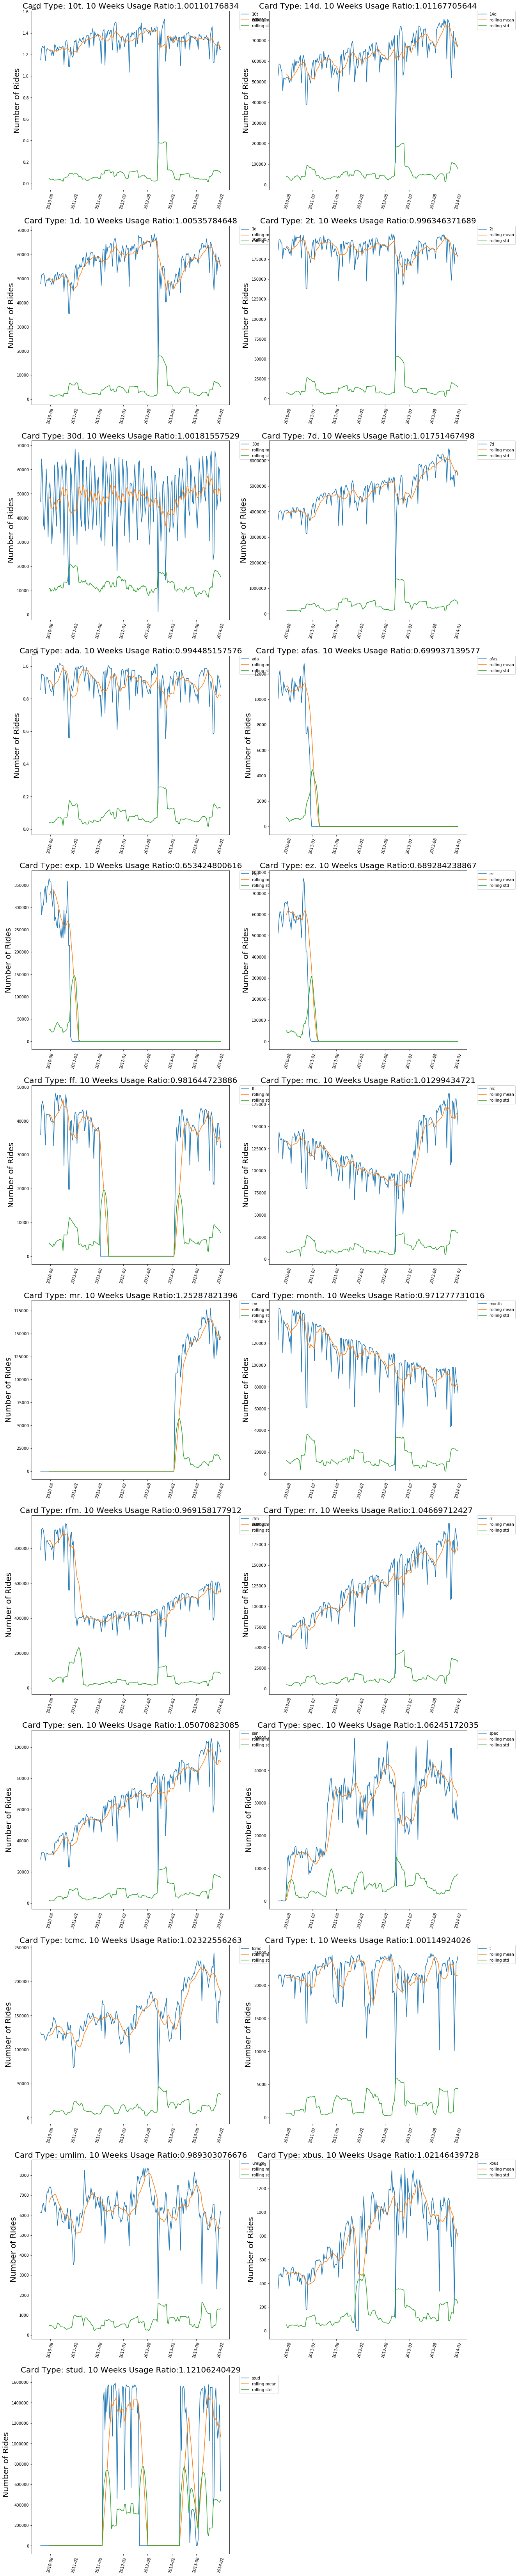

In [19]:
fig = plt.figure(figsize=(20,120))


for i in range(len(ridetype)):
    
    ax = fig.add_subplot(12, 2, i+1)
    
    # plotting the time series for each card type
    ax.plot(time_x, df_card.iloc[:, i], label=ridetype[i])
    
    # plotting the rolling mean and standard deviation for each card type
    ax.plot(time_x, df_r_mean.iloc[:, i], label='rolling mean')
    
    ax.plot(time_x, df_r_std.iloc[:, i], label='rolling std')
    
    # calculate the ratio of usage for first ten weeks against last ten weeks for each card type 
    ts = df_card.iloc[:, i]
    ur = ts.iloc[10: ].mean() / ts.iloc[: -10].mean()
    
    plt.xticks(rotation=75, fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ylabel("Number of Rides", fontsize=20)
    plt.title('Card Type: {}. 10 Weeks Usage Ratio:{}'.format(ridetype[i], ur), fontsize=20)

Fig 4. Each card types time series with rolling mean and rolling standard deviation. Notice the rolling mean smoothing out the short term variation in the time series while still preserving the long term trend. The monthly card exhibits steady decline in its trend with a 0.97 ratio score and the senior card type shows a steady increase in its trend with 

### Senior vs. Monthly

In [20]:
ridetype

array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp', 'ez',
       'ff', 'mc', 'mr', 'month', 'rfm', 'rr', 'sen', 'spec', 'tcmc', 't',
       'umlim', 'xbus', 'stud'], 
      dtype='|S5')

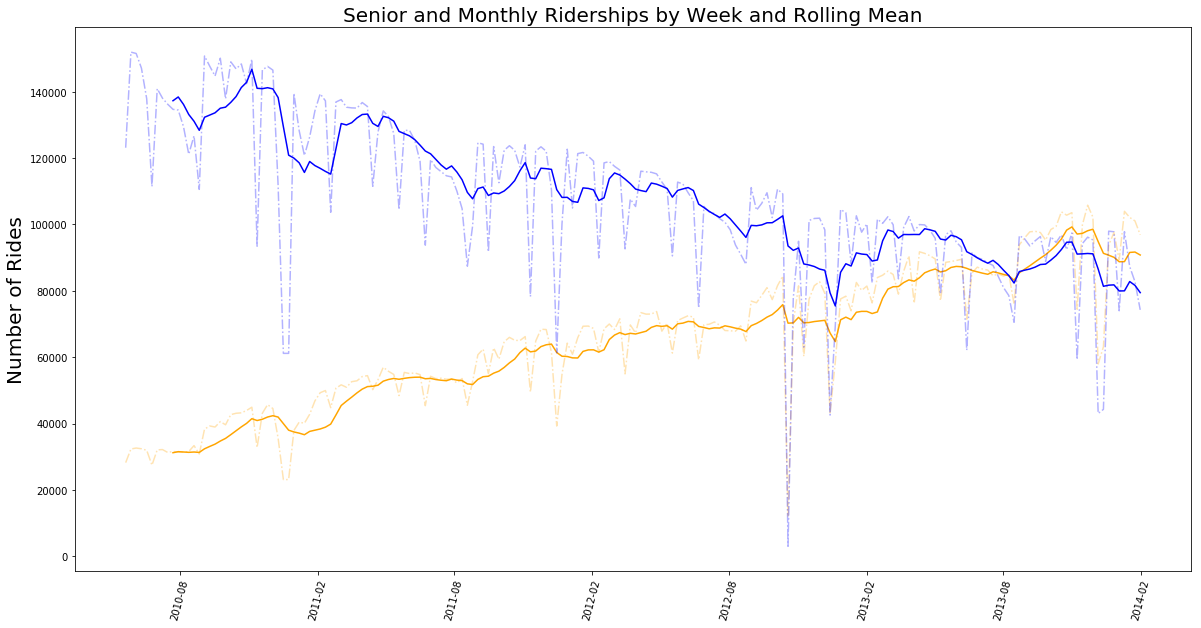

In [21]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)

ax.plot(time_x, df_card['sen'], label='Senior', linestyle='-.', alpha=0.3, c='orange')
ax.plot(time_x, df_r_mean['sen'], label='Senior Rolling Mean', c='orange')

ax.plot(time_x, df_card['month'], label='Monthly', linestyle='-.', alpha=0.3, c='blue')
ax.plot(time_x, df_r_mean['month'], label='Monthly', c='blue')

plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Number of Rides', fontsize=20)
plt.title('Senior and Monthly Riderships by Week and Rolling Mean',fontsize=20)
plt.show()

Fig 5. The monthly card exhibits steady decline in its trend with a 0.97 ratio between the rides in first 10 weeks and last ten weeks and the senior card type shows a steady increase in its trend with 1.05 ratio. 

# Task 3

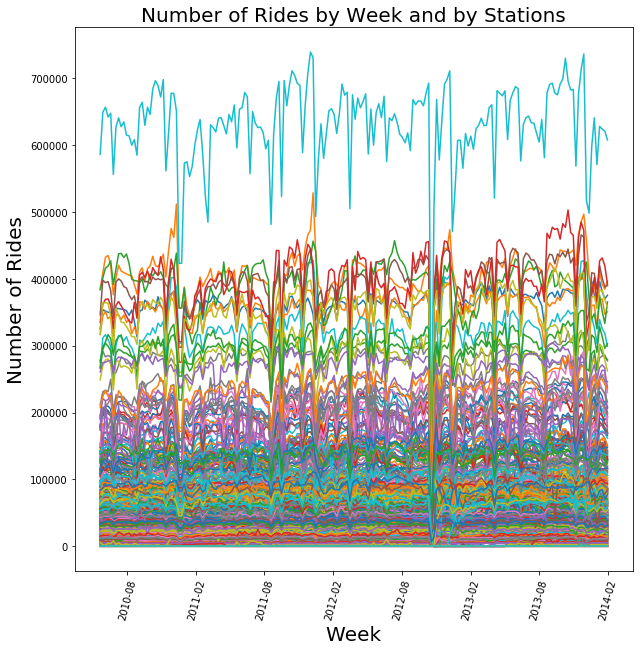

In [22]:
# plot the swipes at each stations 

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

for i in range(typ_allsum.shape[0]):
    ax.plot(time_x, typ_allsum[i,:])

plt.xticks(rotation=75, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Week", fontsize=20)
plt.ylabel("Number of Rides", fontsize=20)
plt.title('Number of Rides by Week and by Stations', fontsize=20)

Fig 6. swipes by week at every stations. 

ValueError: x and y must have same first dimension, but have shapes (98,) and (301,)

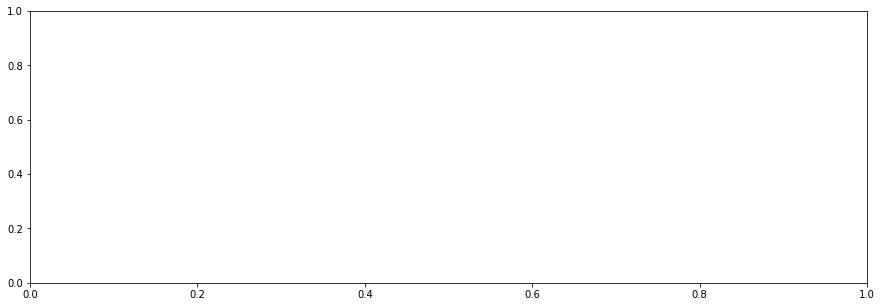

In [23]:
# now use FFT to plot the power spectrum for all station time series

fig = plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)

# set the sampling rate 

N = len(time_x) 

for i in range(typ_allsum.shape[0]):
    
    f = np.abs(np.fft.rfft(typ_allsum[:, i]))**2
    ax.plot(np.fft.rfftfreq(N, 1.0), (f), 'o', ms=20)
    ax.plot(np.fft.rfftfreq(N, 1.0), (f), '-')
    ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
    plt.ylabel("power", fontsize=20)
    plt.xlabel("frequency (1/week)", fontsize=20);


Grade: 8/10 - errors in task 3